In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('data/dogs_n_cats.csv')

In [4]:
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [7]:
y = df['Вид']

In [10]:
df_train = df.drop(['Вид'], axis=1)

In [12]:
df_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [13]:
first_tree = DecisionTreeClassifier(random_state=42)
first_tree.fit(df_train, y)

DecisionTreeClassifier(random_state=42)

In [16]:
test = pd.read_json('data/dataset_209691_15.txt')

In [18]:
test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,33,39.6,1,1,0
2,33,39.6,1,1,0
3,18,21.6,1,1,0
4,24,28.8,1,0,0


In [19]:
first_tree_pred = first_tree.predict(test)

In [20]:
first_tree_pred

array(['собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
  

In [24]:
l = list(first_tree_pred)
l.count('собачка')

45

Ответ: в тестовой выборке 45 объектов = 'собачка'

### Следующий блок заданий

In [26]:
data = pd.read_csv('data/train_data_tree.csv')
data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

 

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

В ответе необходимо указать число с точностью 3 знака после запятой.

In [35]:
X_train = data.drop(['num'], axis=1)
y_train = data['num']

In [40]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
from sklearn import tree

[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

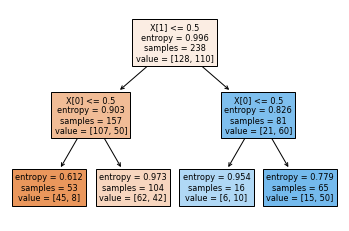

In [42]:
tree.plot_tree(clf, filled=True)

In [47]:
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева

r_node = clf.tree_.children_right[0] # индекс корня правого поддерева
n2 = clf.tree_.n_node_samples[r_node] # сэмплов в правом поддереве
e2 = clf.tree_.impurity[r_node] # энтропия в корне правого поддерева

In [72]:
IG = 0.996 - (n1*e1 + n2*e2)/(n1+n2)
print('Information Gain: {:.3f}'.format(IG))

Information Gain: 0.120


In [73]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz 2.44.1\bin'

### Задача на измерение скорости выполнения команды

In [74]:
df = pd.read_csv('data/iris.csv')
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [75]:
%%timeit
df.describe().loc['mean']

19.9 ms ± 6.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
%%timeit
df.mean(axis=0)

239 µs ± 7.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [77]:
%%timeit
df.apply(np.mean)

2.91 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [78]:
%%timeit
df.apply('mean')

315 µs ± 7.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Блок заданий 3.5 И на Марсе будут яблони цвести

In [79]:
mush = pd.read_csv('data/training_mush.csv')
mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [80]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6093 entries, 0 to 6092
Data columns (total 23 columns):
cap-shape                   6093 non-null int64
cap-surface                 6093 non-null int64
cap-color                   6093 non-null int64
bruises                     6093 non-null int64
odor                        6093 non-null int64
gill-attachment             6093 non-null int64
gill-spacing                6093 non-null int64
gill-size                   6093 non-null int64
gill-color                  6093 non-null int64
stalk-shape                 6093 non-null int64
stalk-root                  6093 non-null int64
stalk-surface-above-ring    6093 non-null int64
stalk-surface-below-ring    6093 non-null int64
stalk-color-above-ring      6093 non-null int64
stalk-color-below-ring      6093 non-null int64
veil-type                   6093 non-null int64
veil-color                  6093 non-null int64
ring-number                 6093 non-null int64
ring-type                   6

In [185]:
X_mush_train = mush.drop(['class'], axis=1)
y_mush_train = mush['class']

In [186]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
forest_params = {'n_estimators': range(10, 50, 10),
                 'max_depth' : range(1, 12, 2),
                 'min_samples_leaf' : range(1, 7),
                 'min_samples_split': range(2, 9, 2)}

rfcl = RandomForestClassifier(random_state=0)

locally_best_forest = GridSearchCV(rfcl,
                                  forest_params, 
                                 verbose=True, n_jobs=-1, cv=3)
locally_best_forest.fit(X_mush_train, y_mush_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s


In [194]:
bp = locally_best_forest.best_params_
bp

{'n_estimators': 40,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 11}

In [137]:
be = locally_best_forest.best_estimator_
be

RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=50, random_state=0)

In [141]:
feature_importances = be.feature_importances_

In [142]:
feature_importances_df = pd.DataFrame({
        'features':list(X_mush_train),
        'feature_importances':feature_importances
})

In [146]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.131069
7,gill-size,0.123100
19,spore-print-color,0.111993
18,ring-type,0.082148
8,gill-color,0.076990
10,stalk-root,0.072423
3,bruises,0.062778
11,stalk-surface-above-ring,0.059834
20,population,0.056652
6,gill-spacing,0.054552


In [148]:
X_test = pd.read_csv('data/testing_mush.csv')
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [149]:
predict_mush = locally_best_forest.predict(X_test)

In [153]:
np.count_nonzero(predict_mush)

976

In [154]:
y_test = pd.read_csv('data/testing_y_mush.csv')

In [156]:
from sklearn.metrics import confusion_matrix

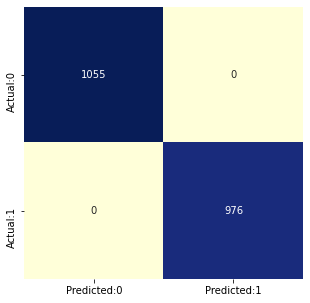

In [157]:
cm = confusion_matrix(y_test, predict_mush)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False)

### Следующий блок заданий

In [159]:
iv = pd.read_csv('data/invasion.csv')
iv.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [163]:
X_train = iv.drop(['class'], axis=1)

In [164]:
y_train = iv['class']

In [165]:
forest_params = {'n_estimators': range(10, 51, 10),
                 'max_depth' : range(1, 19, 2),
                 'min_samples_leaf' : range(1, 8),
                 'min_samples_split': range(2, 10, 2)}

rftransport = RandomForestClassifier(random_state=0)

locally_best_forest = RandomizedSearchCV(rftransport,
                                  forest_params, 
                                 verbose=True, n_jobs=-1, cv=3)
locally_best_forest.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.2s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 19, 2),
                                        'min_samples_leaf': range(1, 8),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(10, 51, 10)},
                   verbose=True)

In [166]:
locally_best_forest.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 5}

In [170]:
X_test = pd.read_csv('data/operative_information.csv')
X_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [171]:
pred_transport = locally_best_forest.predict(X_test)

In [172]:
pred_transport

array(['fighter', 'transport', 'transport', ..., 'transport', 'fighter',
       'transport'], dtype=object)

In [173]:
import collections
collections.Counter(pred_transport)

Counter({'fighter': 675, 'transport': 595, 'cruiser': 230})

In [175]:
b = locally_best_forest.best_estimator_
feat_invasion_importances = b.feature_importances_

In [176]:
feat_invasion_importances_df = pd.DataFrame({
        'features':list(X_train),
        'feature_importances':feat_invasion_importances
})

In [179]:
feat_invasion_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
3,brightness,0.390029
5,volume,0.226153
2,speed,0.184780
1,i_reflection,0.114358
0,g_reflection,0.084520
4,time_of_observance,0.000160


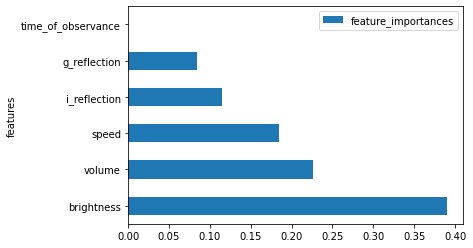

In [183]:
feat_invasion_importances_df.sort_values('feature_importances', ascending=False).plot(kind='barh', x='features')